# MajorContract_Offset
This file rerun the QishiQR/Utils/MajorContract_Offsets.py

In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
# sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
sys.path.insert(0,'/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
# os.chdir('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
from Simengs_utils.MajorContract_sq import MajorContracts
# importlib.reload(Simengs_utils.MajorContract_sq)


In [3]:
freq = 5
offsets = [0.1+i for i in range(5)]
ru_Major = MajorContracts(symbol='ru', training_end_date='2016-6-30', 
                          topdir='/Users/simone/Documents/Projects/Qishi QR/tick2016',
                          maturity={'1605':['2016-1-4','2016-5-16'],
                                    '1609':['2016-1-4','2016-9-19'],
                                    '1701':['2016-1-18','2016-12-30'],
                                    '1705':['2016-5-17', '2016-12-30']},
                          
                          transitions={'1605':['2016-01-04','2016-03-17'],
                                    '1609':['2016-03-18','2016-08-01'],
                                    '1701':['2016-8-2','2016-11-23'],
                                    '1705':['2016-11-24', '2017-12-30']},
                         freq = freq, offset = offsets)
ru_train_mj, ru_test_mj, ru_PT_train_on_mj = ru_Major.create_major_overlap()


ru1605 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1605 ,  trade_range= ['2016-1-4', '2016-5-16'] , transition=[ 2016-01-04 00:00:00 , 2016-03-17 00:00:00 ]
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
ru1609 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1609 ,  trade_range= ['2016-1-4', '2016-9-19'] , transition=[ 2016-03-18 00:00:00 , 2016-08-01 00:00:00 ]
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
ru1701 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1701 ,  trade_range= ['2016-1-18', '2016-12-30'] , transition=[ 2016-08-02 00:00:0

In [2]:
for offset in ru_test_mj.keys():
    ru_test_mj[offset].to_csv(r'../Output/ru_major_test/ru_major_test_' + str(freq) + '_' + offset + '.csv')
for contract in ['1605', '1609']:
    ru_PT_train_on_mj[contract].to_csv(r'../Output/Strategy/ru_'+ contract +
                                       '_major_strategy_' + str(freq) + '_AllOffset'  + '.csv', index=False)

## Backtesting -- Train on Major, Test on Major

In [6]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0,'/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
import importlib 
from Simengs_backtesting.lm_validation_sq import LmValidation

filepath = "/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/Output/Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ru_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']])
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Output/Strategy/ru_major_strategy.csv')
print(slm.head())

ru_1605_major_strategy_5_AllOffset.csv
ru_1609_major_strategy_5_AllOffset.csv
   prior     0      1      2  total signal
0      p  4710  17692  18173  40575      2
1     p0   613   2029   2066   4708      2
2    p00    79    275    259    613      1
3   p000    11     35     33     79      1
4  p0000     2      5      4     11      1


### all

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


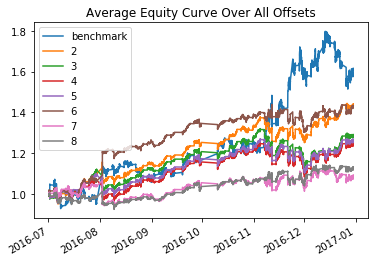

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.406584              0.003611                -0.003454   
1               0.434865              0.002360                -0.003637   
2               0.425013              0.002049                -0.003746   
3               0.432927              0.002187                -0.003747   
4               0.436314              0.003549                -0.003624   
5               0.429820              0.000752                -0.003573   
6               0.428383              0.001088                -0.003158   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001825                  0.000098             -0.106875   
1                 0.001796                  0.000068             -0.124824   
2                 0.001839                  0.000059             -0.124824   
3                 0.001836                  0.000065             -0.124586   
4        

In [7]:
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-7-1', end='2017-1-1',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()

### Contract 1609, end at 8/1

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


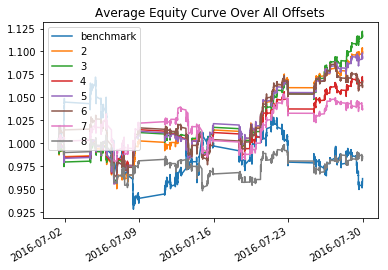

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.343978              0.004742                -0.003542   
1               0.370122              0.005599                -0.003605   
2               0.351432              0.003243                -0.003724   
3               0.367546              0.004473                -0.003701   
4               0.386345              0.002980                -0.003765   
5               0.375711              0.001778                -0.003597   
6               0.362218             -0.000804                -0.003363   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001969                  0.000128             -0.027383   
1                 0.001975                  0.000161             -0.027383   
2                 0.001998                  0.000093             -0.028194   
3                 0.001998                  0.000131             -0.028108   
4        

In [8]:
# transitions={'1605':['2016-01-04','2016-03-17'],
#                                     '1609':['2016-03-18','2016-08-01'],
#                                     '1701':['2016-8-2','2016-11-23'],
#                                     '1705':['2016-11-24', '2017-12-30']},
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-7-1', end='2016-8-2',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()

### Contract 1701, (8/2/2016 - 11/23/2016)

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


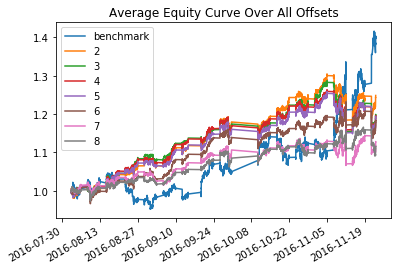

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.315304              0.003359                -0.003010   
1               0.341425              0.002682                -0.003194   
2               0.331190              0.002646                -0.003280   
3               0.342670              0.002614                -0.003284   
4               0.325586              0.002474                -0.003203   
5               0.321840              0.001728                -0.003069   
6               0.344716              0.001560                -0.002691   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001566                  0.000091             -0.057780   
1                 0.001546                  0.000078             -0.057965   
2                 0.001592                  0.000078             -0.057737   
3                 0.001588                  0.000078             -0.057965   
4        

In [9]:
# transitions={'1605':['2016-01-04','2016-03-17'],
#                                     '1609':['2016-03-18','2016-08-01'],
#                                     '1701':['2016-8-2','2016-11-23'],
#                                     '1705':['2016-11-24', '2017-12-30']},
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-8-2', end='2016-11-24',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()